Se importan las librerias que necesitaremos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Se lee el CSV y se observa las 7 primeras filas

In [2]:
df=pd.read_csv('../data/bike_buyers.csv')
df.head(7)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes


Observamos cuantas columnas tenemos en el dataset

In [3]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

Obtenemos la informacion del dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


Obtenemos la descripcion de los valores del dataset obteniendo sus media, max valor,min valor, percentiles,etc

In [5]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


LIMPIEZA DE DATOS

Obtenemos cuantos valores vacios tiene cada columna

In [6]:
df.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

En el caso de las columnas Income,Children,Cars,Age se reemplaza los valores vacios con la media de su respectiva columna

In [7]:
df['Income'].fillna(round(df['Income'].mean()),inplace=True)
df['Children'].fillna(round(df['Children'].mean()),inplace=True)
df['Cars'].fillna(round(df['Cars'].mean()),inplace=True)
df['Age'].fillna(round(df['Age'].mean()),inplace=True)

Ahora nos queda valores vacios en la columna Marital Status,Gender,Home Owner

In [8]:
df.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               0
Children             0
Education            0
Occupation           0
Home Owner           4
Cars                 0
Commute Distance     0
Region               0
Age                  0
Purchased Bike       0
dtype: int64

Para poder reemplazarlos con un valor se obtiene el valor más comun de cada columna

In [9]:
marital_status_comun=df['Marital Status'].value_counts().idxmin()
Gender_comun=df['Gender'].value_counts().idxmin()
Home_Owner_comun=df['Home Owner'].value_counts().idxmin()
print("Valor más comun en marital status:",marital_status_comun)
print("Valor más comun en Gender:",Gender_comun)
print("Valor más comun en Home Owner:",Home_Owner_comun)

Valor más comun en marital status: Single
Valor más comun en Gender: Female
Valor más comun en Home Owner: No


Y se reemplaza reespectivamente con cada valor vacio

In [10]:
df['Marital Status'].fillna(marital_status_comun,inplace=True)
df['Gender'].fillna(Gender_comun,inplace=True)
df['Home Owner'].fillna(Home_Owner_comun,inplace=True)


Ahora observamos que ya no tenemos valores vacios

In [11]:
df.isna().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

Nos ocupamos de los valores duplicados del dataset 

In [12]:
df=df.drop_duplicates()

Obtenemos el tipo de valor de cada una de las columnas del dataset

In [13]:
print(df.dtypes)

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object


Cambiamos el tipo de valor de datos de las columnas correspondientes

In [14]:
df = df.astype({'Income': 'int64', 'Children': 'int64', 'Cars': 'int64', 'Age': 'int64'})

print(df.dtypes)

ID                   int64
Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
dtype: object


Separamos las columnas entre valor numerico y valor string para una mayor facilidad de trabajo

In [15]:
columnas_strings=df.select_dtypes(include='object').columns
columnas_numericas=df.select_dtypes(include=['int64']).columns

Observamos si existen valores atipicos en el dataset

<AxesSubplot:>

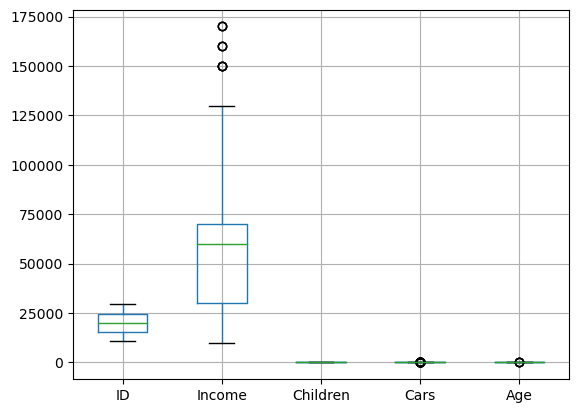

In [16]:
df.boxplot(columnas_numericas.to_list())

Vemos que encontramos valores atipicos en la columna Income,Cars y Age

Para poder lidiar con los valores atipicos utilizaremos el metodo IQR

Primero obtenemos el Q1 y Q3 de la columna en este caso Income

In [17]:
Q1_income=df.Income.quantile(0.25)
Q3_income=df.Income.quantile(0.75)
Q1_income,Q3_income

(30000.0, 70000.0)

Despues los restamos para obtener el IQR de la columna

In [18]:
IQR_income=Q3_income-Q1_income
IQR_income

40000.0

Obtenemos el Lower limit y el Upper limit de la columna

In [19]:
Lower_limit_income=Q1_income-1.5*IQR_income
Upper_limit_income=Q3_income+1.5*IQR_income
Lower_limit_income,Upper_limit_income

(-30000.0, 130000.0)

Observamos las filas con los valores atipicos en la columna

In [20]:
df[(df.Income<Lower_limit_income)|(df.Income>Upper_limit_income)]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
6,27974,Single,Male,160000,2,High School,Management,No,4,0-1 Miles,Pacific,33,Yes
12,11434,Married,Male,170000,5,Partial College,Professional,Yes,1,0-1 Miles,Europe,55,No
43,17185,Married,Female,170000,4,Partial College,Professional,No,3,5-10 Miles,Europe,48,Yes
121,15922,Married,Male,150000,2,High School,Professional,Yes,4,0-1 Miles,Europe,48,No
178,14191,Married,Male,160000,4,Partial College,Professional,No,2,10+ Miles,Europe,55,Yes
259,12705,Married,Male,150000,0,Bachelors,Management,Yes,4,0-1 Miles,Pacific,37,Yes
321,16675,Single,Female,160000,0,Graduate Degree,Management,No,3,0-1 Miles,Pacific,47,Yes
356,23608,Married,Female,150000,3,High School,Professional,Yes,3,0-1 Miles,Europe,51,Yes
829,16009,Single,Male,170000,1,Graduate Degree,Management,No,4,0-1 Miles,North America,66,No
993,11292,Single,Male,150000,1,Partial College,Professional,No,3,0-1 Miles,North America,44,Yes


Creamos un nuevo dataset sin los valores atipicos de la columna

In [21]:
df_sin_outliers_income=df[(df.Income>=Lower_limit_income)&(df.Income<=Upper_limit_income)]
df_sin_outliers_income

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Female,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,Married,Female,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


Repetimos el mismo proceso ahora con la columna Cars y Age

In [22]:
Q1_cars=df_sin_outliers_income.Cars.quantile(0.25)
Q3_cars=df_sin_outliers_income.Cars.quantile(0.75)
print(Q1_cars,Q3_cars)

IQR_cars=Q3_cars-Q1_cars
print(IQR_cars)

Lower_limit_cars=round(Q1_cars-1.5*IQR_cars)
Upper_limit_cars=round(Q3_cars+1.5*IQR_cars)
Lower_limit_cars,Upper_limit_cars

1.0 2.0
1.0


(0, 4)

In [23]:
df_sin_outliers_income[(df_sin_outliers_income.Cars<Lower_limit_cars)|(df_sin_outliers_income.Cars>Upper_limit_cars)]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [24]:
df_sin_outliers_cars=df_sin_outliers_income[(df_sin_outliers_income.Cars>=Lower_limit_cars)&(df_sin_outliers_income.Cars<=Upper_limit_cars)]
df_sin_outliers_cars

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Female,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,Married,Female,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


In [25]:
Q1_age=df_sin_outliers_cars.Age.quantile(0.25)
Q3_age=df_sin_outliers_cars.Age.quantile(0.75)
print(Q1_age,Q3_age)

IQR_age=Q3_age-Q1_age
print(IQR_age)

Lower_limit_age=round(Q1_age-1.5*IQR_age)
Upper_limit_age=round(Q3_age+1.5*IQR_age)
Lower_limit_age,Upper_limit_age

35.0 52.0
17.0


(10, 78)

In [26]:
df_sin_outliers_cars[(df_sin_outliers_cars.Age<Lower_limit_age)|(df_sin_outliers_cars.Age>Upper_limit_age)]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
375,15628,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,1,0-1 Miles,Europe,89,No
401,11555,Married,Female,40000,1,Bachelors,Clerical,Yes,0,0-1 Miles,Europe,80,No


In [27]:
df_limpio=df_sin_outliers_cars[(df_sin_outliers_cars.Age>=Lower_limit_age)&(df_sin_outliers_cars.Age<=Upper_limit_age)]
df_limpio

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Female,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,Married,Female,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


Obtenemos un nuevo dataset limpio sin los valores aitpicos, sin valores vacios y sin valoes repetidos llamado df_limpio

Luego, lo guardamos en un nuevo archivo CSV

In [28]:
df.to_csv('../data/bike_buyers_limpio.csv')